Test với input shape 2100, full label

In [ ]:
import os
import csiread
import numpy as np

dataset_path = r'E:\Downloads\PBL5\Gait_Dataset\Gait_Dataset\CSI_Gait'
all_lengths = []
user_lengths = {}

for sub_folder in os.listdir(dataset_path):
    sub_folder_path = os.path.join(dataset_path, sub_folder)

    if not os.path.isdir(sub_folder_path):
        continue

    for user in os.listdir(sub_folder_path):
        user_path = os.path.join(sub_folder_path, user)

        if not os.path.isdir(user_path):
            continue

        lengths_per_user = []
        for file_name in os.listdir(user_path):
            if file_name.endswith(('.dat', '.npy')):  # Thêm các định dạng file CSI khác nếu cần
                file_path = os.path.join(user_path, file_name)
                try:
                    if file_name.endswith('.dat'):
                        csidata = csiread.Intel(file_path, 3, 1)
                        csidata.read()
                        csi_data = csidata.get_scaled_csi()
                    elif file_name.endswith('.npy'):
                        csi_data = np.load(file_path)
                    else:
                        continue

                    length = csi_data.shape[0]
                    all_lengths.append(length)
                    lengths_per_user.append(length)

                except Exception as e:
                    print(f"Lỗi khi đọc file {file_name} của user {user}: {e}")

        if lengths_per_user:
            user_lengths[user] = lengths_per_user

# In ra độ dài của tất cả các file
print("Độ dài (số lượng frame) của tất cả các file CSI:")
print(all_lengths)

# In ra độ dài của các file CSI theo từng user
print("\nĐộ dài (số lượng frame) của các file CSI theo từng user:")
for user, lengths in user_lengths.items():
    print(f"User {user}: {lengths}")

# Thống kê về độ dài
if all_lengths:
    print(f"\nThống kê về độ dài:")
    print(f"Độ dài trung bình: {np.mean(all_lengths):.2f}")
    print(f"Độ dài lớn nhất: {np.max(all_lengths)}")
    print(f"Độ dài nhỏ nhất: {np.min(all_lengths)}")
    print(f"Độ lệch chuẩn: {np.std(all_lengths):.2f}")

    # Bạn có thể muốn xem phân phối của độ dài
    # import matplotlib.pyplot as plt
    # plt.hist(all_lengths, bins=50)
    # plt.title('Phân phối độ dài của dữ liệu CSI')
    # plt.xlabel('Số lượng frame')
    # plt.ylabel('Số lượng file')
    # plt.show()
else:
    print("Không tìm thấy file CSI nào.")

Độ dài (số lượng frame) của mẫu file CSI:
[3039, 2957, 2914, 3066, 3045, 2567, 2610, 2689, 2621, 2728, 2517, 2791, 2594, 2547, 2725, 2584, 2712, 2558, 2695, 2795, 2468, 2570, 2561, 2517, 2585, 2746, 2766, 2773, 2728, 2706, 3008, 2866, 2844, 2821, 2923, 2959, 3029, 2848, 2905, 2658, 2257, 2384, 2330, 2223, 2445, 3252, 2964, 2992, 3009, 2830, 2829, 2662, 2763, 2827, 2761, 2830, 3055, 2861, 2982, 3025, 2854, 2891, 2777, 2766, 2775]

Độ dài (số lượng frame) của mẫu file CSI theo từng user:
User user1: [3252, 2964, 2992, 3009, 2830]
User user2: [2854, 2891, 2777, 2766, 2775]
User user3: [2517, 2791, 2594, 2547, 2725]
User user4: [2584, 2712, 2558, 2695, 2795]
User user5: [2468, 2570, 2561, 2517, 2585]
User user6: [2746, 2766, 2773, 2728, 2706]
User user7: [3008, 2866, 2844, 2821, 2923]
User user8: [2959, 3029, 2848, 2905, 2658]
User user9: [2257, 2384, 2330, 2223, 2445]
User user10: [2829, 2662, 2763, 2827, 2761]
User user11: [2830, 3055, 2861, 2982, 3025]

Thống kê về độ dài (mẫu):
Độ dài 

In [1]:
import os
import random

dataset_path = r'E:\Downloads\PBL5\Gait_Dataset\Gait_Dataset\CSI_Gait'
dirrr = []
user_files = {}  # Lưu trữ tất cả file của từng user

for sub_folder in os.listdir(dataset_path):
    sub_folder_path = os.path.join(dataset_path, sub_folder)

    if not os.path.isdir(sub_folder_path):
        continue

    # Duyệt qua các user trong mỗi thư mục con
    for user in os.listdir(sub_folder_path):
        user_path = os.path.join(sub_folder_path, user)

        if not os.path.isdir(user_path):
            continue

        files = os.listdir(user_path)
        num_files = len(files)
        print(f'{sub_folder} ---- {user} {num_files}')

        if user not in user_files:
            user_files[user] = []
        user_files[user].extend([os.path.join(user_path, file) for file in files])

for user, files in user_files.items():
    sample_size = int(len(files) * 1)  # Lấy toàn bộ file (tỉ lệ 1)
    sampled_files = random.sample(files, sample_size)
    dirrr.extend(sampled_files)
    print(f'{user} ---- {len(sampled_files)}/{len(files)} files selected')

print(f'Total files collected: {len(dirrr)}')
list_IDs=dirrr

20190627 ---- user1 2400
20190627 ---- user2 2400
20190706 ---- user3 2400
20190707 ---- user4 2400
20190713 ---- user5 1889
20190713 ---- user6 2400
20190713 ---- user7 2399
20190718 ---- user8 1200
20190718 ---- user9 1200
20190719 ---- user1 480
20190719 ---- user10 1200
20190719 ---- user11 1200
20190719 ---- user2 480
user1 ---- 2880/2880 files selected
user2 ---- 2880/2880 files selected
user3 ---- 2400/2400 files selected
user4 ---- 2400/2400 files selected
user5 ---- 1889/1889 files selected
user6 ---- 2400/2400 files selected
user7 ---- 2399/2399 files selected
user8 ---- 1200/1200 files selected
user9 ---- 1200/1200 files selected
user10 ---- 1200/1200 files selected
user11 ---- 1200/1200 files selected
Total files collected: 22048


KeyboardInterrupt: 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os  # Thêm thư viện os để xử lý đường dẫn

def plottt(inpp):
    """
    Vẽ biểu đồ phân phối label từ danh sách đường dẫn file.

    Args:
        inpp (list): Danh sách các đường dẫn file.
    """
    # Dictionary for label mapping (dựa trên tên thư mục user)
    label_map = {
        'user1': 0,
        'user2': 1,
        'user3': 2,
        'user4': 3,
        'user5': 4,
        'user6': 5,
        'user7': 6,
        'user8': 7,
        'user9': 8,
        'user10': 9,
        'user11': 10,
    }

    labels = []
    for ID in inpp:
        # Trích xuất tên thư mục người dùng từ đường dẫn
        user_folder = os.path.basename(os.path.dirname(ID))
        label = label_map.get(user_folder, -1)
        if label != -1:
            labels.append(label)
        else:
            print(f"Cảnh báo: Không tìm thấy nhãn cho thư mục: {user_folder} trong file: {ID}")

    # Plot distribution
    sns.histplot(labels, discrete=True, kde=False)  # Thêm discrete=True cho dữ liệu rời rạc
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title('Label Distribution')
    plt.xticks(range(len(label_map)), label_map.values()) # Hiển thị đúng giá trị label
    plt.show()

# Ví dụ sử dụng (giả sử bạn có một danh sách đường dẫn 'file_paths'):
# file_paths = [...]
# plottt(file_paths)

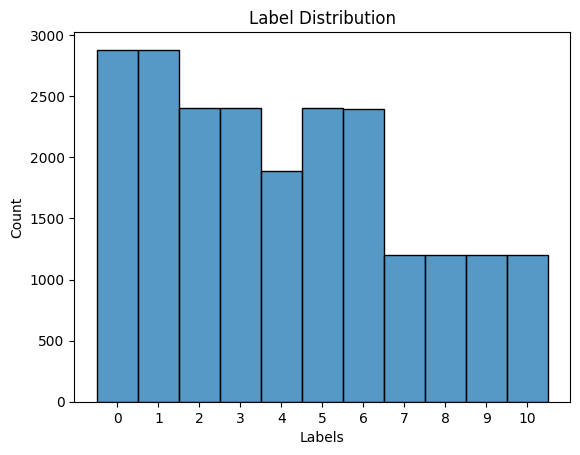

In [3]:
plottt(list_IDs)

In [ ]:
import csiread
import numpy as np
for i, ID in enumerate(dirrr[::-1]):
    csidata = csiread.Intel(ID, 3, 1)
    csidata.read()
    dat_ = csidata.get_scaled_csi()
    dat_ = np.abs(dat_)
    
    if dat_.shape[0] < 2500:
        print('hi')
        print(dat_.shape[0])
        del dirrr[len(dirrr) - 1 - i]  # Remove the element from the original list


In [4]:
import numpy as np
import tensorflow as tf
import csiread
import os  # thêm để xử lý đường dẫn

class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32,dim=(2100, 90), n_channels=90, 
                 n_classes=11, shuffle=True):
        'Initialization'
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.n = 0
        self.on_epoch_end()

    def __next__(self):
        # Get one batch of data
        data = self.__getitem__(self.n)
        self.n += 1

        # Reset index if all batches have been processed
        if self.n >= self.__len__():
            self.on_epoch_end()
            self.n = 0

        return data

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        X, y = self.__data_generation(list_IDs_temp)
        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp): 
        'Generates data containing batch_size samples'
        X = np.empty((self.batch_size, 2100, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Dictionary for label mapping
        label_map = {
            'user1': 0, 'user2': 1, 'user3': 2, 'user4': 3, 'user5': 4,
            'user6': 5, 'user7': 6, 'user8': 7, 'user9': 8, 'user10': 9, 'user11': 10
        }

        def resize_data(data, start_index=0, end_index=2300, target_length=2100):
            """
            Lấy một khoảng dữ liệu cụ thể và sau đó resize nó về độ dài mục tiêu.

            Args:
                data (np.ndarray): Mảng dữ liệu đầu vào.
                start_index (int): Chỉ số bắt đầu của khoảng (bao gồm). Mặc định là 0.
                end_index (int): Chỉ số kết thúc của khoảng (không bao gồm). Mặc định là 500.
                target_length (int): Độ dài mục tiêu sau khi crop. Mặc định là 2100.

            Returns:
                np.ndarray: Dữ liệu đã được crop và resize về target_length.
            """
            current_length = data.shape[0]

            # Crop dữ liệu trong khoảng [start_index:end_index]
            cropped_data = data[start_index:min(end_index, current_length)]
            cropped_length = cropped_data.shape[0]

            # Resize dữ liệu đã crop về target_length
            if cropped_length > target_length:
                return cropped_data[:target_length]
            elif cropped_length < target_length:
                padding_length = target_length - cropped_length
                padding = np.zeros((padding_length, *cropped_data.shape[1:]))
                return np.concatenate((cropped_data, padding), axis=0)
            else:
                return cropped_data
        
        for i, ID in enumerate(list_IDs_temp):
            # Trích xuất tên thư mục người dùng từ đường dẫn
            user_folder = os.path.basename(os.path.dirname(ID))
            lab_str = user_folder
            lab_ = label_map.get(lab_str, -1)

            if lab_ == -1:
                print(f"Cảnh báo: Không tìm thấy nhãn cho thư mục: {lab_str} trong file: {ID}")


#HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
            # Load CSI data
            csidata = csiread.Intel(ID, 3, 1)
            csidata.read()
            dat_ = csidata.get_scaled_csi()
            
            dat_ = np.abs(dat_)  # Lấy giá trị biên độ
            dat_ = resize_data(dat_)  # Resize về đúng 2100 frame
            # Reshape và chuẩn hóa
            dat_ = dat_.reshape(2100, 3 * 30)
            a_min, a_max = dat_.min(), dat_.max()
            if a_max - a_min != 0:
                dat_ = (dat_ - a_min) / (a_max - a_min)
            else:
                dat_ = np.zeros_like(dat_)
            # Gán vào batch
            X[i] = dat_
            y[i] = lab_

        return X, tf.keras.utils.to_categorical(y, num_classes=self.n_classes)


In [5]:
from sklearn.model_selection import train_test_split

# Hyperparameters
params = {
    'dim': 2100,
    'batch_size': 32,
    'n_classes': 11,
    'n_channels': 90,
    'shuffle': True
}

# Split dataset with shuffling
X_train, X_test = train_test_split(
    list_IDs,
    test_size=0.2,
    shuffle=True,
    random_state=50
)

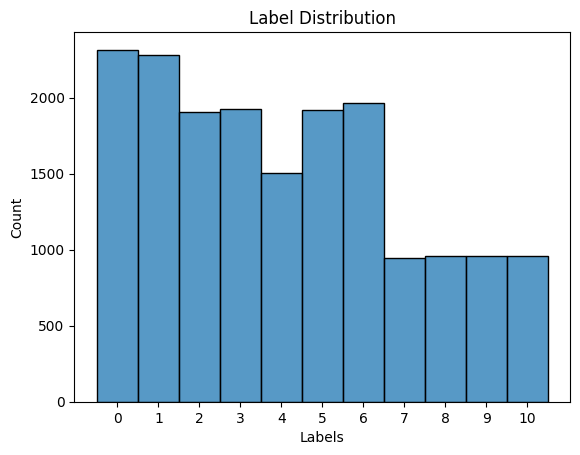

In [6]:
plottt(X_train)

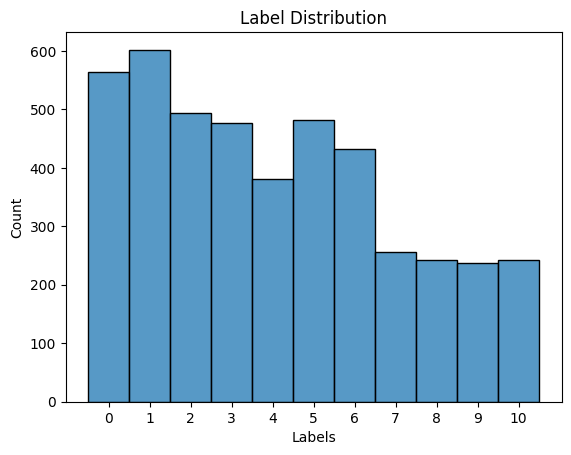

In [7]:
plottt(X_test)

In [8]:
import tensorflow as tf
import keras
import numpy as np
data_augmentation = tf.keras.Sequential(
     [tf.keras.layers.experimental.preprocessing.Normalization()],
     name="data_augmentation",
 )

def channel_padding(x):
    """
    zero padding in an axis of channel
    """

    return tf.keras.backend.concatenate([x, tf.zeros_like(x)], axis=-1)


def single_blaze_block(x, filters=24, kernel_size=5, strides=1, padding='same'):

    # depth-wise separable convolution
    x_0 = tf.keras.layers.SeparableConv1D(
        filters=filters,
        kernel_size=kernel_size,
        strides=strides,
        padding=padding,
        use_bias=False)(x)

    x_1 = tf.keras.layers.BatchNormalization()(x_0) #keras.layers.BatchNormalization

    # Residual connection

    if strides == 2:
        input_channels = x.shape[-1]
        output_channels = x_1.shape[-1]

        x_ = tf.keras.layers.MaxPooling1D()(x)

        if output_channels - input_channels != 0:

            # channel padding
            x_ = tf.keras.layers.Lambda(channel_padding)(x_)

        out = tf.keras.layers.Add()([x_1, x_])
        return tf.keras.layers.Activation("relu")(out)

    out = tf.keras.layers.Add()([x_1, x])
    return tf.keras.layers.Activation("relu")(out)

def double_blaze_block(x, filters_1=24, filters_2=96,
                     kernel_size=5, strides=1, padding='same'):

    # depth-wise separable convolution, project

    x_0 = tf.keras.layers.SeparableConv1D(
        filters=filters_1,
        kernel_size=kernel_size,
        strides=strides,
        padding=padding,
        use_bias=False)(x)

    x_1 = tf.keras.layers.BatchNormalization()(x_0)

    x_2 = tf.keras.layers.Activation("relu")(x_1)

    # depth-wise separable convolution, expand

    x_3 = tf.keras.layers.SeparableConv1D(
        filters=filters_2,
        kernel_size=kernel_size,
        strides=1,
        padding=padding,
        use_bias=False)(x_2)

    x_4 = tf.keras.layers.BatchNormalization()(x_3)

    # Residual connection

    if strides == 2:
        input_channels = x.shape[-1]
        output_channels = x_4.shape[-1]

        x_ = tf.keras.layers.MaxPooling1D()(x)

        if output_channels - input_channels != 0:

            # channel padding
            x_ = tf.keras.layers.Lambda(channel_padding)(x_)

        out = tf.keras.layers.Add()([x_4, x_])
        return tf.keras.layers.Activation("relu")(out)

    out = tf.keras.layers.Add()([x_4, x])
    return tf.keras.layers.Activation("relu")(out)


def BlazeFace(input_shape):

    inputs =(tf.keras.layers.Input(shape=input_shape))
    #inputs=keras.layers.experimental.preprocessing.Normalization(inputs)
    q=data_augmentation(inputs)
    #print('hi')

    x_0 = tf.keras.layers.Conv1D(
        filters=24, kernel_size=(5), strides=2, padding='same')(inputs)
    x_0 = tf.keras.layers.BatchNormalization()(x_0)
    x_0 = tf.keras.layers.Activation("relu")(x_0)

    # Single BlazeBlock phase
    x_1 = single_blaze_block(x_0)

    #x_help = keras.layers.SeparableConv2D(filters=24,kernel_size=(2,2))(x_1)
    x_2 = single_blaze_block(x_1)
    x_3 = single_blaze_block(x_2, strides=2, filters=48)
    x_4 = single_blaze_block(x_3, filters=48)
    x_5 = single_blaze_block(x_4, filters=48)

    x_help = tf.keras.layers.SeparableConv1D(filters=48,kernel_size=(2), activation='relu')(x_5)

    # # Double BlazeBlock phase

    x_6 = double_blaze_block(x_help, strides=2)
    #print(x_5.shape)
    x_7 = double_blaze_block(x_6)
    x_8 = double_blaze_block(x_7)
    # #print(x_8.shape)

    # #x_help2 = keras.layers.SeparableConv2D(filters=96,kernel_size=(2,2))(x_8)
    x_9 = double_blaze_block(x_8, strides=2)

    x_10 = double_blaze_block(x_9)

    x_11 = double_blaze_block(x_10)

    x_12 = tf.keras.layers.SeparableConv1D(filters=96,kernel_size=2, activation='relu')(x_11)

    x_12 = tf.keras.layers.MaxPooling1D()(x_12)
    x_12 = tf.keras.layers.SeparableConv1D(filters=96,kernel_size=2, activation='relu')(x_12)
    x_12 = tf.keras.layers.BatchNormalization()(x_12)
    x_12 = tf.keras.layers.MaxPooling1D()(x_12)
    x_12 = tf.keras.layers.SeparableConv1D(filters=96,kernel_size=2, activation='relu')(x_12)
    x_12 = tf.keras.layers.BatchNormalization()(x_12)
    x_12 = tf.keras.layers.MaxPooling1D()(x_12)
    x_12 = tf.keras.layers.SeparableConv1D(filters=96,kernel_size=2, activation='relu')(x_12)
    x_12 = tf.keras.layers.BatchNormalization()(x_12)
    #x_12 = keras.layers.MaxPooling2D()(x_12)
    x_12 = tf.keras.layers.Flatten()(x_12)
    x_12 = tf.keras.layers.Dense(64, activation='relu')(x_12)
    x_12 = tf.keras.layers.Dense(11, activation='softmax')(x_12)





    model = tf.keras.models.Model(inputs=inputs, outputs=x_12)
    return model



In [ ]:
x_train=np.array(X_train)
x_test=np.array(X_test)
#np.save('x_train2.npy',x_train)
#np.save('x_test2.npy',x_test)
training_generator = DataGenerator(X_train, 2, **params)
testing_generator = DataGenerator(X_test, 2, **params)
a,b=training_generator.__next__()
a.max()
np.array(data_augmentation(a)).min(),a.min()

(0.0, 0.0)

In [10]:
layer = tf.keras.layers.experimental.preprocessing.Normalization()
layer.adapt(a)
layer(a[0][0])

<tf.Tensor: shape=(1, 1, 90), dtype=float32, numpy=
array([[[ 1.7054076 ,  0.1381593 ,  0.40615904,  1.4619076 ,
          0.00383809,  0.2740267 ,  1.4961406 ,  0.08880385,
          0.48153815,  1.7139196 ,  0.03916723,  0.3502617 ,
          1.5672789 ,  0.1419654 ,  0.24854855,  1.5065414 ,
          0.04574875, -0.00841474,  1.4080395 ,  0.21497   ,
         -0.10984613,  1.0221279 ,  0.14740758, -0.14525646,
          0.15142234,  0.06759193, -0.26494938,  0.7144968 ,
         -0.00264528, -0.17695405,  0.7918053 ,  0.13253666,
         -0.30593354,  0.57923645,  0.19038512, -0.43189022,
          0.4109202 ,  0.04343692, -0.23159266, -0.10325552,
         -0.20268318, -0.3527508 ,  0.17492765, -0.22757222,
         -0.30403402,  0.19126655, -0.42934203, -0.5975325 ,
          0.0320772 , -0.29333052, -0.6486871 ,  0.0331197 ,
         -0.21038055, -0.5343809 , -0.19199902, -0.6324884 ,
         -0.2686859 , -0.4881219 , -0.77953434, -0.28717455,
         -0.37908512, -0.66291404

In [13]:
from keras.layers import Input, Lambda, Conv1D, MaxPooling1D, BatchNormalization, ELU, ReLU, Reshape, Concatenate, Activation

blaze_face = BlazeFace((2100, 90))
blaze_face.compile(loss='categorical_crossentropy',
                   optimizer=tf.optimizers.Adam(), 
                   metrics=['accuracy'])

blaze_face.summary()
checkpoint_filepath = 'E:/Downloads/PBL5/Models'
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('E:/Downloads/PBL5/Models/f2100/best_model.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2100, 90)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 1050, 24)     10824       ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 1050, 24)    96          ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 1050, 24)     0           ['batch_normalization[0][0]']

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
import time
# Thêm EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5,           
    restore_best_weights=True  
)

# Cập nhật callbacks trong fit()
sta = time.time()
history = blaze_face.fit(
    training_generator,
    epochs=10,
    validation_data=testing_generator,
    callbacks=[mc, early_stopping] 
)
print(time.time() - sta)


Epoch 1/10
551/551 [==============================] - ETA: 0s - loss: 1.5992 - accuracy: 0.4273
Epoch 1: val_loss improved from inf to 2.15715, saving model to E:/Downloads/PBL5/Models/f2100\best_model.hdf5
551/551 [==============================] - 1097s 2s/step - loss: 1.5992 - accuracy: 0.4273 - val_loss: 2.1571 - val_accuracy: 0.2616
Epoch 2/10
551/551 [==============================] - ETA: 0s - loss: 0.8549 - accuracy: 0.6636
Epoch 2: val_loss did not improve from 2.15715
551/551 [==============================] - 754s 1s/step - loss: 0.8549 - accuracy: 0.6636 - val_loss: 2.3124 - val_accuracy: 0.4313
Epoch 3/10
551/551 [==============================] - ETA: 0s - loss: 0.6535 - accuracy: 0.7367
Epoch 3: val_loss improved from 2.15715 to 1.06567, saving model to E:/Downloads/PBL5/Models/f2100\best_model.hdf5
551/551 [==============================] - 650s 1s/step - loss: 0.6535 - accuracy: 0.7367 - val_loss: 1.0657 - val_accuracy: 0.6444
Epoch 4/10
551/551 [======================

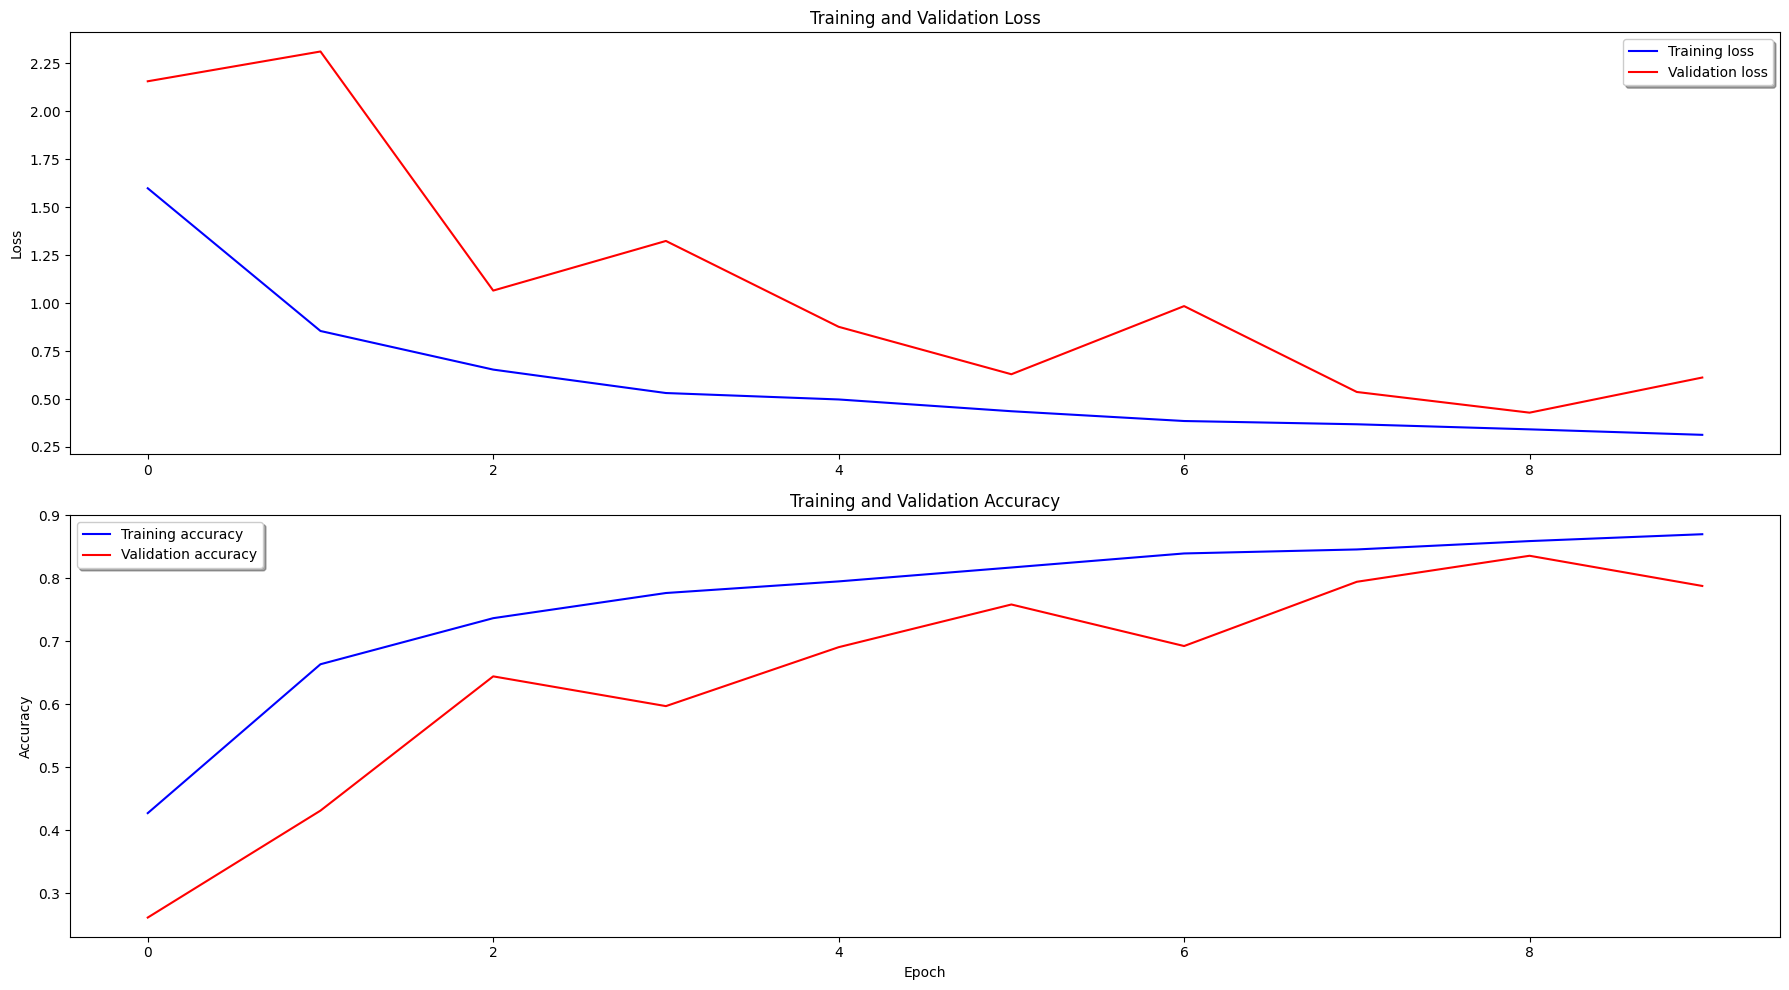

In [16]:
import matplotlib.pyplot as plt

# Giả sử 'history' đã được định nghĩa sau quá trình huấn luyện

fig, ax = plt.subplots(2, 1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_ylabel('Loss')
ax[0].set_title('Training and Validation Loss')

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Load lại model đã lưu
model = load_model('E:/Downloads/PBL5/Models/f2100/best_model.hdf5')

# Tiếp tục huấn luyện nếu muốn
history = model.fit(
    training_generator,
    epochs=50,  # đặt cao hơn epoch cũ
    validation_data=testing_generator,
    callbacks=[mc, early_stopping]  # dùng lại callback cũ nếu muốn
)


test

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Dự đoán và gom dữ liệu cùng lúc, tránh append từng phần tử
a, b = [], []

for i, m in testing_generator:
    p1 = blaze_face.predict(i, verbose=0)  # Tắt log dự đoán để tăng tốc
    a.append(p1)
    b.append(m)

# Chuyển list thành numpy array 1 lần thay vì mỗi vòng lặp
a = np.vstack(a)  # Trực tiếp chuyển thành ma trận 2D
b = np.vstack(b)

# Lấy nhãn dự đoán và nhãn thực tế
a1 = np.argmax(a, axis=1)
b1 = np.argmax(b, axis=1)

# Kết quả
a1, b1

(array([ 5,  8,  0, ...,  6, 10,  1], dtype=int64),
 array([ 5,  8,  0, ...,  6, 10,  1], dtype=int64))

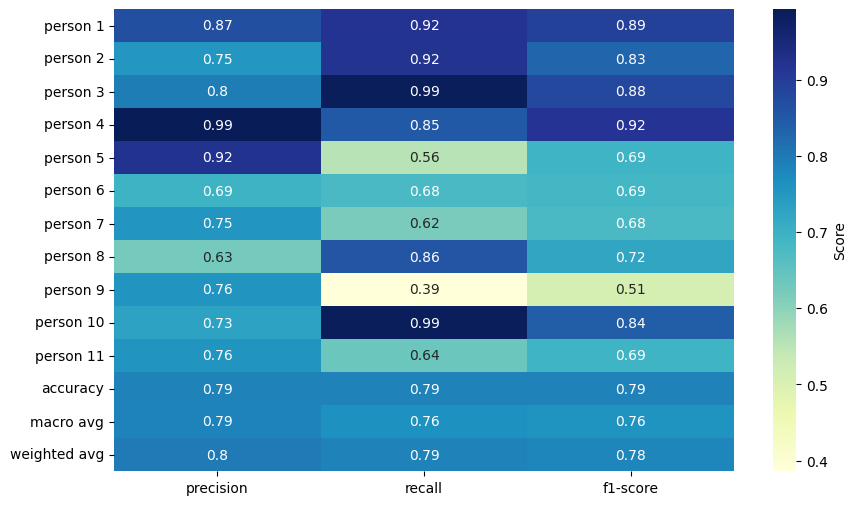

In [20]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo báo cáo phân loại dưới dạng từ điển
target_names = ['person 1', 'person 2', 'person 3', 'person 4', 'person 5', 'person 6', 'person 7','person 8','person 9','person 10','person 11']
clf_report = classification_report(b1, a1, target_names=target_names, output_dict=True)

# In báo cáo phân loại
#print(classification_report(b1, a1, target_names=target_names))

# Vẽ heatmap trực tiếp từ DataFrame, bỏ qua cột 'accuracy'
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Score'})

# Lưu kết quả đúng định dạng
plt.savefig('classification_report.png', dpi=300, bbox_inches='tight')  # Lưu file là PNG
plt.show()


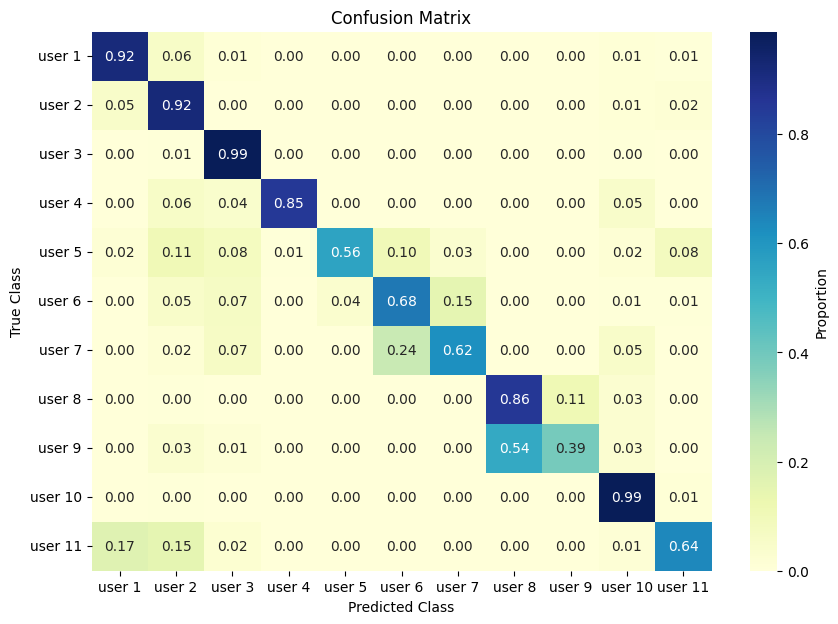

In [24]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Giả sử 'a' là one-hot encoded predictions và 'b' là one-hot encoded true labels
# Đảm bảo rằng 'a' và 'b' là các mảng numpy

# Tính confusion matrix và chuẩn hóa theo hàng
cm = confusion_matrix(np.argmax(b, axis=1), np.argmax(a, axis=1), normalize='true')

# Tạo danh sách tên lớp là "user 1" đến "user 11"
classes = [f"user {i}" for i in range(1, 12)]
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True,cmap='YlGnBu', fmt=".2f",  cbar_kws={'label': 'Proportion'}) # fmt=".2f" để hiển thị 2 chữ số thập phân
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix.pdf')
plt.show()